In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=1000, centers=3, n_features=2)

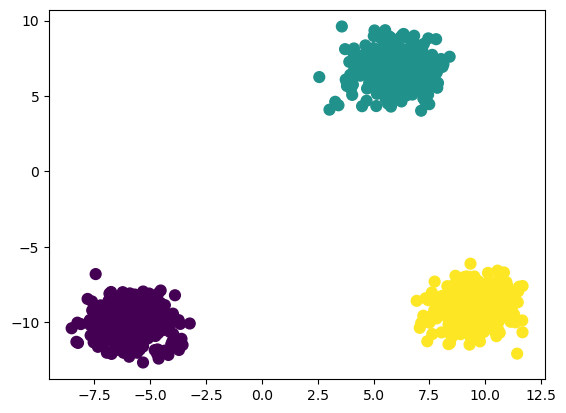

In [3]:
plt.scatter(X[:,0],X[:,1], c=y, cmap='viridis',s=60)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit_transform(X)

array([[ 0.36700339,  1.23624085],
       [ 0.3836174 ,  1.31332823],
       [ 0.29549494,  1.33339545],
       ...,
       [ 0.31498571,  1.28769134],
       [ 0.87178774, -0.61378948],
       [ 1.02082044, -0.50004172]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [6]:
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.cluster import KMeans

In [8]:
##Elbow Method to select K value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [9]:
wcss

[1339.9999999999995,
 514.1040872486562,
 26.00835913316198,
 22.846365019968804,
 19.689132775261147,
 16.48413125118241,
 15.164509758527181,
 13.260980704126032,
 12.197545257595202,
 10.347677605860857]

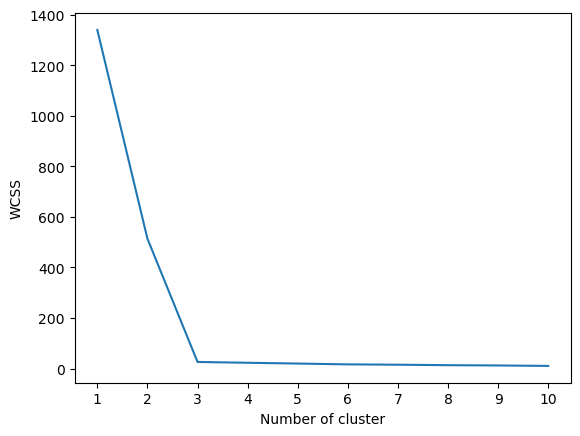

In [10]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [11]:
### we see that from 3 the number of cluster becomes stable so we will use 3 

In [12]:
kmeans=KMeans(n_clusters=3, init="k-means++")
kmeans.fit_predict(X_train_scaled)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1,
       2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2,
       1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 0,
       0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0,
       2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0,
       0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 1,
       0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1,

In [13]:
y_pred=kmeans.predict(X_test_scaled)

In [14]:
y_pred

array([2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 2,
       0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 1,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2,
       1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2,
       1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2,
       0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0,
       0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 0, 2,
       1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1,

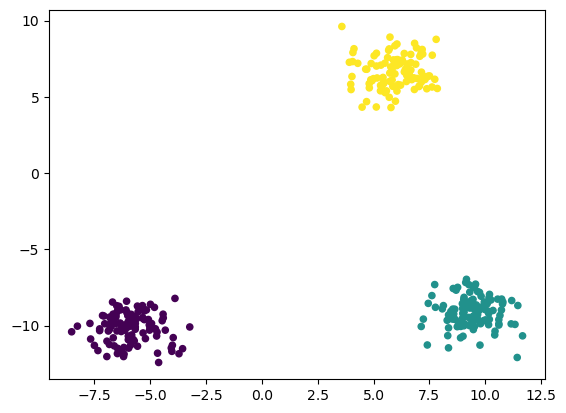

In [15]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_pred, cmap='viridis',s=20)

In [16]:
### other ways of validationg the k Value

##kneelocator 
##silhoutee scoring

In [17]:
###kneelocator
!pip install kneed

In [20]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow

3

In [22]:
### Sillhoute scoring
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [23]:
silhouette_coefficients

[0.6595089554237057,
 0.8851279125465785,
 0.6914864908413266,
 0.5145795929418807,
 0.5194275567059992,
 0.5307317222483795,
 0.35281546227072014,
 0.35851000395168664,
 0.35263509171527463]

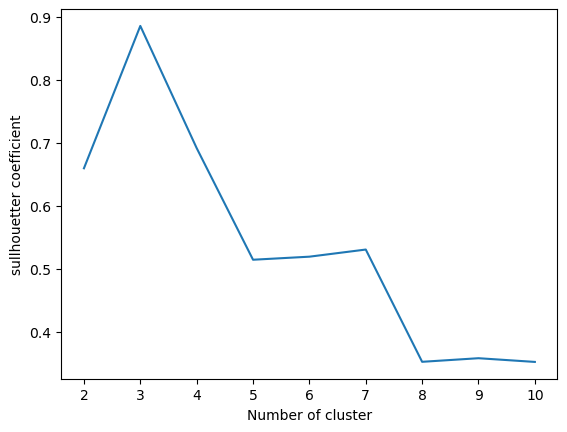

In [28]:
#plot silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of cluster")
plt.ylabel("sullhouetter coefficient")
plt.show()

In [ ]:
## here 3 is the highest score so we use 3 as the k value 